### x lines of Python

# Code golf: Let x = 1

Code golf... reducing functions to their smallest possible size. Like x lines of Python, but x = 1.

This notebook goes with a blog post of the same name.

## Ricker wavelet: 95 chars

First, define our short function:

In [1]:
def r(l,d,f):import numpy as n;t=n.arange(-l/2,l/2,d);k=(n.pi*f*t)**2;return t,(1-2*k)/n.exp(k)

Now import the version in `bruges` for comparison:

In [2]:
from bruges.filters import ricker

Plot the two together:

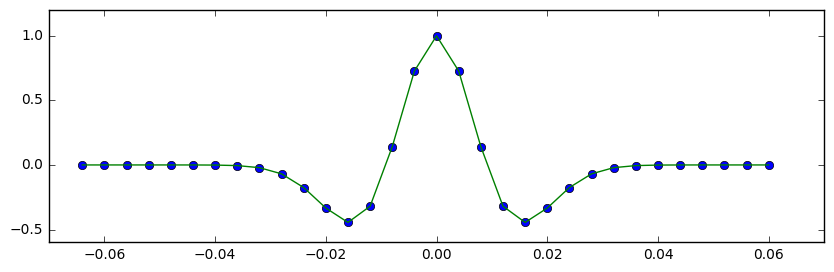

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t, w = r(0.128, 0.004, 25)

plt.figure(figsize=(10,3))
plt.plot(t, ricker(0.128, 0.004, 25), 'o')  # Compare to bruges.
plt.plot(t, w)
plt.xlim(-0.07, 0.07)
plt.show()

We can use the `inspect` module ot compare the source code:

In [4]:
import inspect
inspect.getsource(r).strip()

'def r(l,d,f):import numpy as n;t=n.arange(-l/2,l/2,d);k=(n.pi*f*t)**2;return t,(1-2*k)/n.exp(k)'

In [5]:
len(inspect.getsource(r).strip())

95

In [6]:
len(inspect.getsource(ricker).strip())

1033

## Ormsby wavelet: 168 chars

This kind of wavelet takes four frequencies — the corners of a trapezoid. We'll pass a 4-tuple to the function, so `f` will be something like `(8, 16, 64, 72)`. (The `bruges` version is more tolerant of different situations, but we don't have the characters to cope with anything else.

In [7]:
def o(l,d,f):import numpy as n;t=n.arange(-l/2,l/2,d);p=n.pi;f,g,h,i=f;λ=lambda ϕ,t:(n.sinc(ϕ*t)*p*ϕ)**2;A=(λ(i,t)-λ(h,t))/(i-h)-(λ(g,t)-λ(f,t))/(g-f);return t,A/max(A)

In [8]:
from bruges.filters import ormsby

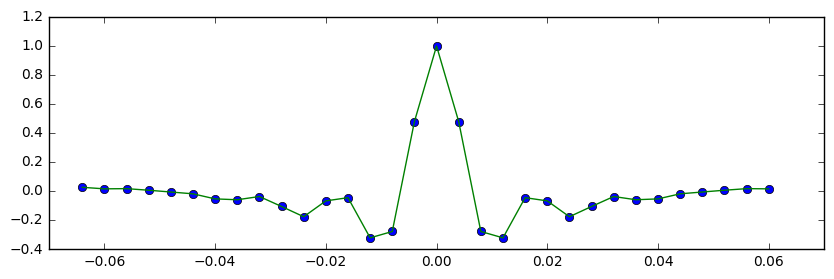

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

t, w = o(0.128, 0.004, [8, 12, 60, 80])

plt.figure(figsize=(10,3))
plt.plot(t, ormsby(0.128, 0.004, [8, 12, 60, 80]), 'o')  # Compare to bruges.
plt.plot(t, w)
plt.xlim(-0.07, 0.07)
plt.show()

In [10]:
inspect.getsource(o).strip()

'def o(l,d,f):import numpy as n;t=n.arange(-l/2,l/2,d);p=n.pi;f,g,h,i=f;λ=lambda ϕ,t:(n.sinc(ϕ*t)*p*ϕ)**2;A=(λ(i,t)-λ(h,t))/(i-h)-(λ(g,t)-λ(f,t))/(g-f);return t,A/max(A)'

In [11]:
len(inspect.getsource(o).strip())

168

In [12]:
len(inspect.getsource(ormsby).strip())

1545

## Aki-Richards: 179 chars

In [13]:
def a(α,β,ρ,χ,ψ,ω,t):import numpy as n;w=ω-ρ;x=ω+ρ;y=ψ+β;p=n.pi*t/180;s=n.sin(p);return w/x-(y/α)**2*w/x*s**2+(χ-α)/(χ+α)/n.cos((p+n.arcsin(χ/α*s))/2)**2-(y/α)**2*(2*(ψ-β)/y)*s**2

In [14]:
from bruges.reflection import akirichards

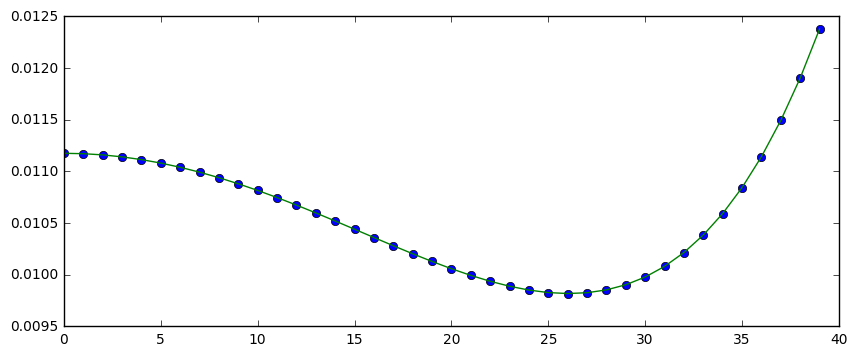

In [15]:
# 4-term Aki-Richards equation in 255 characters!
# http://subsurfwiki.org/wiki/Aki–Richards_equation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rock1 = (2300, 1200, 2500)  # Vp, Vs, rho for layer 1
rock2 = (2400, 1250, 2450)  # Vp, Vs, rho for layer 2
theta1 = np.arange(40)

result = a(*rock1, *rock2, theta1)

plt.figure(figsize=(10,4))
plt.plot(akirichards(*rock1, *rock2, theta1), 'o')
plt.plot(result)

plt.show()

In [16]:
inspect.getsource(a).strip()

'def a(α,β,ρ,χ,ψ,ω,t):import numpy as n;w=ω-ρ;x=ω+ρ;y=ψ+β;p=n.pi*t/180;s=n.sin(p);return w/x-(y/α)**2*w/x*s**2+(χ-α)/(χ+α)/n.cos((p+n.arcsin(χ/α*s))/2)**2-(y/α)**2*(2*(ψ-β)/y)*s**2'

In [17]:
len(inspect.getsource(a).strip())

179

In [18]:
len(inspect.getsource(akirichards).strip())

1828

## Exact Zoeppritz: 386 chars

From Dvorkin et al. (2014). Seismic Reflections of Rock Properties. Cambridge.

I can't find a way to get rid of any of the newlines or indents.

In [19]:
def z(α,β,ρ,χ,ψ,ω,t):import numpy as n;t=n.pi*t/180;C=n.cos;A=n.arcsin;S=n.sin;p=S(t)/α;u=A(p*χ);ϕ=A(p*β);υ=A(p*ψ);v=lambda w,x,y,z: y-2*y*S(z)**2+2*w*S(x)**2;a=ω-2*ω*S(υ)**2-ρ+2*ρ*S(ϕ)**2;b=v(ρ,ϕ,ω,υ);x=v(ω,υ,ρ,ϕ);d=2*(ω*ψ**2-ρ*β**2);E=b*C(t)/α+x*C(u)/χ;F=b*C(ϕ)/β+x*C(υ)/ψ;G=a-d*C(t)/α*C(υ)/ψ;H=a-d*C(u)/χ*C(ϕ)/β;return(F*(b*C(t)/α-x*C(u)/χ)-H*p**2*(a+d*C(t)/α*C(υ)/ψ))/(E*F+G*H*p**2)

In [20]:
from bruges.reflection import zoeppritz_rpp

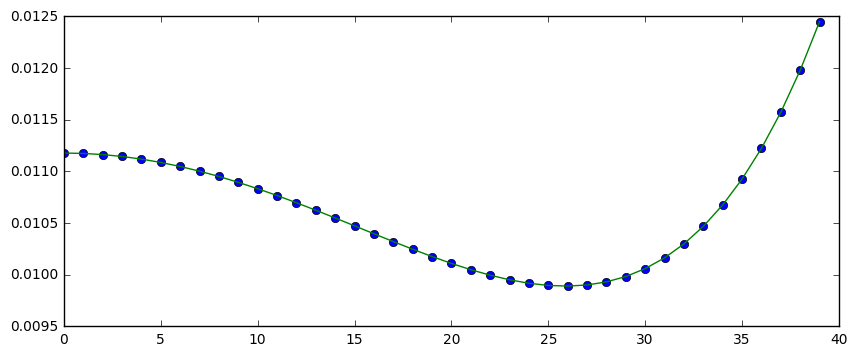

In [21]:
result = z(*rock1, *rock2, np.arange(40))

plt.figure(figsize=(10,4))
plt.plot(zoeppritz_rpp(*rock1, *rock2, theta1), 'o')
plt.plot(result)
plt.show()

In [22]:
inspect.getsource(z).strip()

'def z(α,β,ρ,χ,ψ,ω,t):import numpy as n;t=n.pi*t/180;C=n.cos;A=n.arcsin;S=n.sin;p=S(t)/α;u=A(p*χ);ϕ=A(p*β);υ=A(p*ψ);v=lambda w,x,y,z: y-2*y*S(z)**2+2*w*S(x)**2;a=ω-2*ω*S(υ)**2-ρ+2*ρ*S(ϕ)**2;b=v(ρ,ϕ,ω,υ);x=v(ω,υ,ρ,ϕ);d=2*(ω*ψ**2-ρ*β**2);E=b*C(t)/α+x*C(u)/χ;F=b*C(ϕ)/β+x*C(υ)/ψ;G=a-d*C(t)/α*C(υ)/ψ;H=a-d*C(u)/χ*C(ϕ)/β;return(F*(b*C(t)/α-x*C(u)/χ)-H*p**2*(a+d*C(t)/α*C(υ)/ψ))/(E*F+G*H*p**2)'

In [23]:
len(inspect.getsource(z).strip())

386

In [24]:
len(inspect.getsource(zoeppritz_rpp).strip())

1198

## Bonus: synthetic seismogram in 111 chars

We'll treat the acoustic case only (i.e. no elasticity). We'll assume we have Vp and RHOB logs in time, with a 1 ms sample interval.

And let's use our Ricker function from above, asking it for a 100 ms wavelet at 75 Hz.

In [25]:
def generate_data(bias, length=501):
    return bias + 10 * np.convolve(np.ones(20), np.random.randn(length) - 0.5, mode='same')

vp = generate_data(2600)
rhob = generate_data(2800)

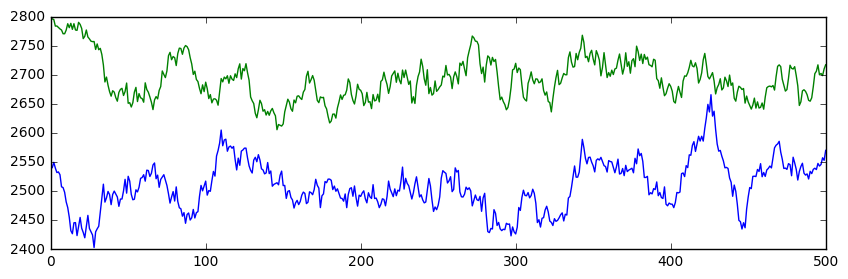

In [26]:
plt.figure(figsize=(10,3))
plt.plot(vp)
plt.plot(rhob)
plt.show()

In [27]:
def s(v,ρ,l,d,f):import numpy as n;i=v*ρ;t,w=r(l,d,f);return n.convolve(w,n.diff(i)/(i[1:]+i[:-1]),mode='same')

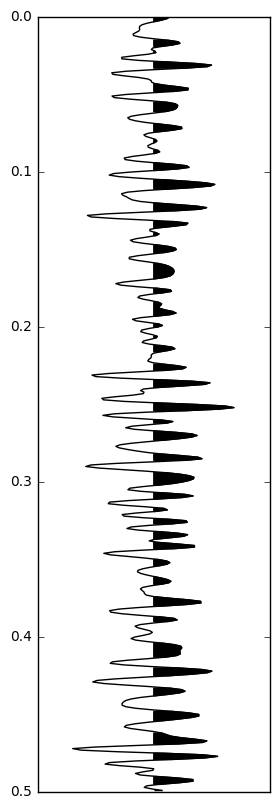

In [28]:
t = np.arange(0, 0.5, 0.001)
length, dt, freq = (0.1, 0.001, 75)
x = s(vp, rhob, length, dt, freq)

fig = plt.figure(figsize=(3, 10))
ax = fig.add_subplot(111)
ax.plot(x, t, 'k')
ax.fill_betweenx(t, x, 0, x>0, color='k')
ax.invert_yaxis()
ax.set_xticks([])

plt.show()

In [29]:
inspect.getsource(s).strip()

"def s(v,ρ,l,d,f):import numpy as n;i=v*ρ;t,w=r(l,d,f);return n.convolve(w,n.diff(i)/(i[1:]+i[:-1]),mode='same')"

In [30]:
len(inspect.getsource(s).strip())

111

## Yet another aside: What if we built in the Ricker? Only 204 chars

In [31]:
def s(v,ρ,l,d,f):import numpy as n;r=lambda l,d,f:(1-2*(n.pi*f*n.arange(-l/2,l/2,d))**2)/n.exp((n.pi*f*n.arange(-l/2,l/2,d))**2);i=v*ρ;return n.convolve(r(.1,.001,75),n.diff(i)/(i[1:]+i[:-1]),mode='same')

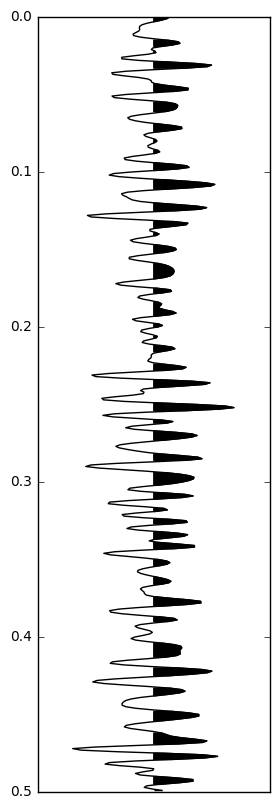

In [32]:
fig = plt.figure(figsize=(3, 10))
ax = fig.add_subplot(111)
ax.plot(x, t, 'k')
ax.fill_betweenx(t, x, 0, x>0, color='k')
ax.invert_yaxis()
ax.set_xticks([])

plt.show()

In [33]:
inspect.getsource(s).strip()

"def s(v,ρ,l,d,f):import numpy as n;r=lambda l,d,f:(1-2*(n.pi*f*n.arange(-l/2,l/2,d))**2)/n.exp((n.pi*f*n.arange(-l/2,l/2,d))**2);i=v*ρ;return n.convolve(r(.1,.001,75),n.diff(i)/(i[1:]+i[:-1]),mode='same')"

In [34]:
len(inspect.getsource(s).strip())

204

<hr>

**&copy; 2017 [agilescientific.com](https://www.agilescientific.com/) and licensed [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)**